In [1]:
import pandas as pd
census_dataset = pd.read_csv('LondonCensus.csv')
crime_dataset = pd.read_csv('MPS_Ward_Level_Crime_Historic_NewWard.csv')

### it returns the 10 London Boroughs that have the maximum number of crimes


In [2]:
complete_ds = pd.merge(census_dataset, crime_dataset)

crime_time = crime_dataset.drop(
    ['WardName', 'MajorCategory', 'MinorCategory'], axis=1)
crime_time.groupby('WardCode').sum()
crime_time['meanCrime'] = crime_time.mean(axis=1)
crime_time['varCrime'] = crime_time.std(axis=1)
crime_time = crime_time[['WardCode', 'meanCrime', 'varCrime']]
max_num_crime = crime_time.nlargest(10, ['meanCrime'])
max_num_crime

/tmp/ipykernel_36442/2568318099.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  crime_time.groupby('WardCode').sum()
/tmp/ipykernel_36442/2568318099.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  crime_time['meanCrime'] = crime_time.mean(axis=1)
/tmp/ipykernel_36442/2568318099.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  crime_time['varCrime'] = crime_time.std(axis=1)


,WardCode,meanCrime,varCrime
19885,E05000649,475.942857,129.621488
19880,E05000644,357.057143,97.327119
19945,E05000649,218.723810,129.901244
19925,E05000649,187.961905,32.062713
19940,E05000644,174.571429,98.698662
3615,E05000138,127.571429,37.016305
3606,E05000129,120.952381,32.746176
19877,E05000641,98.885714,25.016305
10023,E05000331,94.790476,18.728992
14827,E05000492,91.447619,22.479612


/tmp/ipykernel_36442/600850484.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pop_info['NumPeoples'] = pop_info['AreaSqKm'] * pop_info['PopDen']
/tmp/ipykernel_36442/600850484.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  crime_time = crime_time.groupby(['NESW', 'MajorCategory']).sum()
/tmp/ipykernel_36442/600850484.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

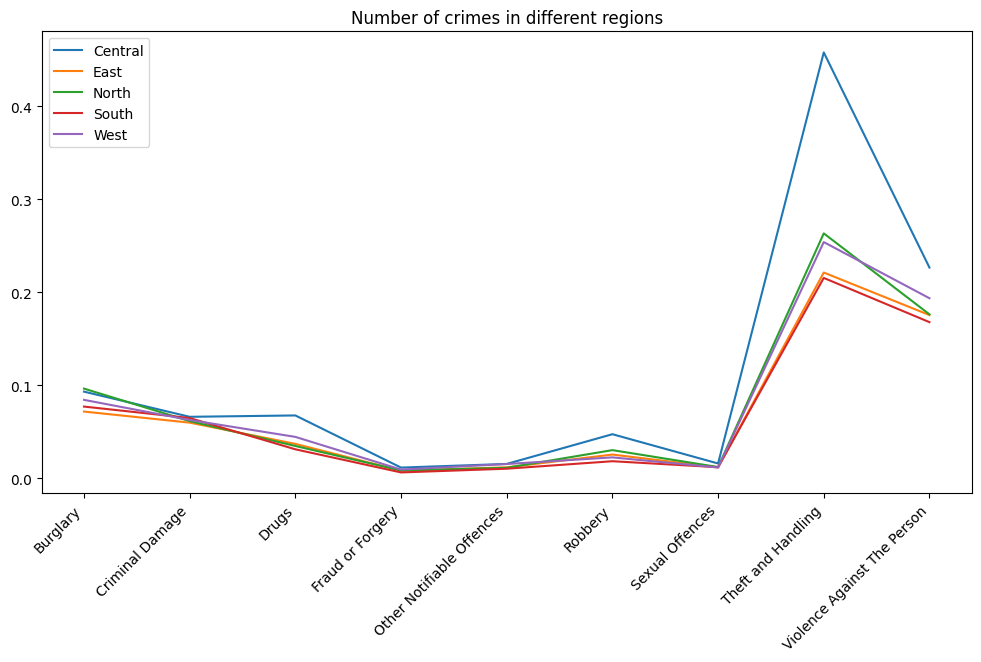

In [3]:
import matplotlib.pyplot as plt

pop_info = census_dataset[['NESW', 'AreaSqKm', 'PopDen']]
pop_info['NumPeoples'] = pop_info['AreaSqKm'] * pop_info['PopDen']
pop_info = pop_info[['NESW', 'NumPeoples']]
pop_info = pop_info.groupby('NESW').sum()
pop_info = pop_info.reset_index()
tmp_crime = pd.merge(
    crime_dataset, census_dataset[['WardCode', 'NESW']])
crime_time = tmp_crime.drop(['WardCode'], axis=1)
crime_time = crime_time.groupby(['NESW', 'MajorCategory']).sum()
crime_time['totCrime'] = crime_time.sum(axis=1)
crime_time = crime_time['totCrime']
crime_time_ni = crime_time.reset_index()
plt.figure(figsize=(12, 6))
plt.title('Number of crimes in different regions')
for region in crime_time_ni['NESW'].unique():
    tmp = crime_time_ni[crime_time_ni['NESW'] == region]
    tmp['totCrime'] = tmp['totCrime']/(pop_info[pop_info['NESW'] == region].iat[0,1])
    tmp = tmp.drop(['NESW'], axis=1)
    tmp = tmp.groupby('MajorCategory').mean()
    plt.plot(tmp, label=region)
    plt.xticks(rotation=45, ha="right")
    plt.legend()


In [4]:
crime_time = crime_dataset.drop(
    ['WardName', 'MajorCategory', 'MinorCategory', 'Borough'], axis=1)
crime_time.groupby('WardCode').sum()

columns = crime_time.columns.to_list()
columns.remove('WardCode')
years = []
months = []
for column in columns:
    years.append(column[2:6])
    months.append(column[6:])

year_month = pd.DataFrame({'Years': years, 'Months': months, 'date': columns})

crime_time = crime_time.transpose()
crime_time = crime_time.reset_index()
crime_time['index'].iloc[0] = 'date'
new_header = crime_time.iloc[0]
crime_time = crime_time[1:]
crime_time.columns = new_header
time_analysis = pd.merge(crime_time, year_month)
time_analysis


,date,E05000026,E05000027,E05000028,E05000029,E05000030,E05000031,E05000032,E05000033,E05000034,...,E05000642,E05000643,E05000644,E05000645,E05000646,E05000647,E05000648,E05000649,Years,Months
0,T_201004,9,7,10,10,3,8,7,10,8,...,3,0,5,0,2,0,0,8,2010,04
1,T_201005,4,3,6,10,5,3,6,3,7,...,1,0,14,0,4,0,0,9,2010,05
2,T_201006,6,8,21,11,2,2,7,10,9,...,2,0,9,2,1,1,0,7,2010,06
3,T_201007,6,12,7,8,6,12,8,9,10,...,1,1,10,0,0,2,4,15,2010,07
4,T_201008,12,12,13,13,4,18,3,14,7,...,2,2,13,0,0,13,0,14,2010,08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,T_201808,3,4,3,4,3,6,5,12,2,...,4,3,29,3,5,3,4,19,2018,08
101,T_201809,6,4,6,8,6,9,3,10,3,...,4,1,32,3,3,2,2,32,2018,09
102,T_201810,6,8,5,5,6,6,7,5,4,...,1,1,33,2,3,1,3,30,2018,10
103,T_201811,4,4,10,10,11,16,2,4,7,...,2,1,25,3,5,3,10,21,2018,11


#### Check if there is a relation between the number of crimes and the months

Text(0, 0.5, 'number of crimes')

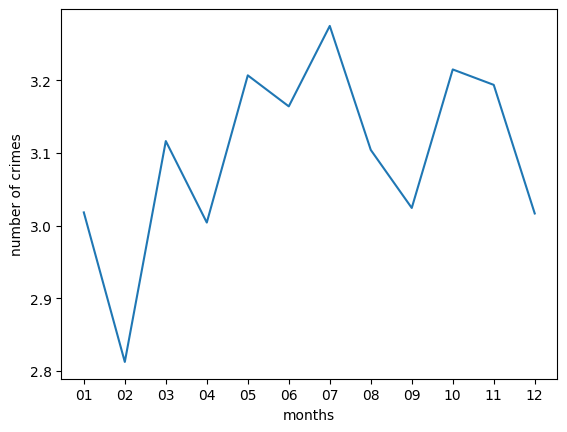

In [10]:
import matplotlib.pyplot as plt
month_analysis = time_analysis.drop(['date', 'Years'], axis=1)
month_analysis = month_analysis.groupby('Months').mean()
month_analysis = month_analysis.mean(axis=1)
plt.plot(month_analysis)
plt.xlabel('months')
plt.ylabel('number of crimes')
